# Fit AR(p) model
In this exercise, we will fit an AR(p) model to a time series.The timeseries is already stationary and we will use two different methods to choose the number of lag (p) to include. First we will start by loading and displaying the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


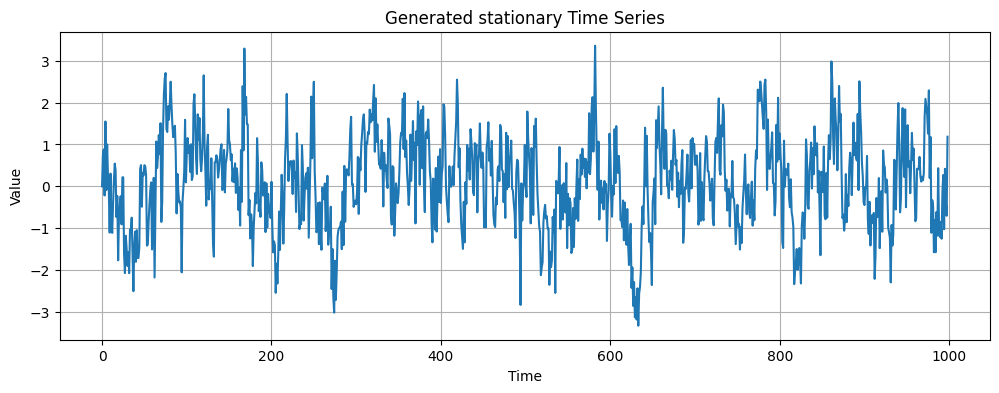

In [2]:
#load data
data = np.loadtxt('generated_time_series.csv', delimiter=',', skiprows=1)

#plot data
plt.figure(figsize=(12, 4))
plt.plot(data)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Generated stationary Time Series')
plt.grid(True)

Next we can use `plot_acf` to plot the autocorrelation function of the time series. From the resulting plot we can see that that there is autocorrelation present in the data.

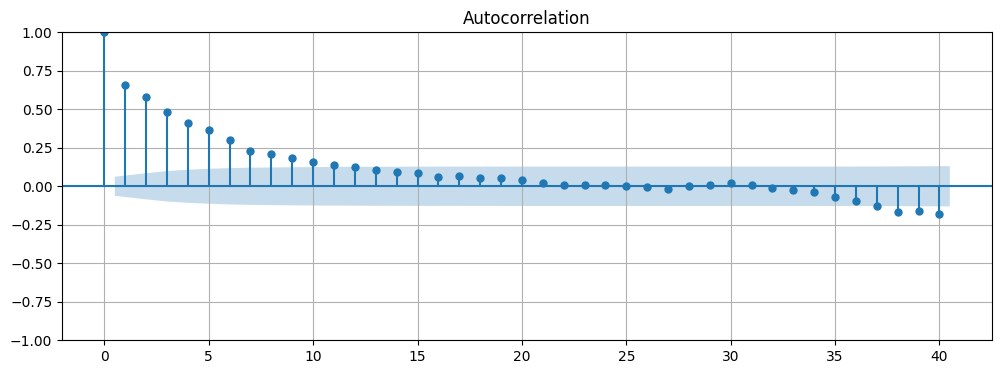

In [3]:

# Plot the ACF of the time series
fig, ax = plt.subplots(figsize=(12, 4))
plot_acf(data, lags=40, ax=ax)
ax.grid(True);



A good indication for the number of lags to include in the AR model is the number of lags that are significant according to the PACF (partial autocorrelation function). We can use the `plot_pacf` function to plot the PACF of the time series. From the resulting plot we can see that the first lag and the second lag are significant. This suggests that we should use an AR(2) model.

```{note}
The PACF is similar to the ACF, but it is the correlation between the time series and a lagged version of itself that is not explained by correlations at all lower-order lags. In other words, the PACF is the ACF with the linear dependence of the earlier lags removed.
```

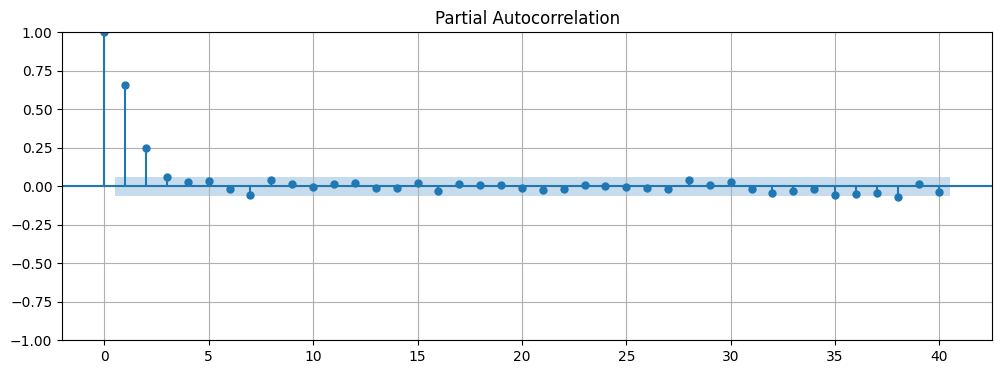

In [4]:
# Plot the PACF of the time series
fig, ax = plt.subplots(figsize=(12, 4))
plot_pacf(data, lags=40, ax=ax)
ax.grid(True);


To make sure that we have selected the correct number of lags, we can test for significance using the generalized likelihood ratio test (GLRT). For a detailed explanation of the GLRT, see the chapter on observation theory. We will apply the GLRT to the AR(1) vs AR(2) and AR(2) vs AR(3) models. 

The AR(1), AR(2) and AR(3) models are defined as follows:

AR(1): $S_t = \phi_1 S_{t-1} + \epsilon_t$

AR(2): $S_t = \phi_1 S_{t-1} + \phi_2 S_{t-2} + \epsilon_t$

AR(3): $S_t = \phi_1 S_{t-1} + \phi_2 S_{t-2} + \phi_3 S_{t-3} + \epsilon_t$

Since we need $S_{t-3}$ we will have $y = S[3:]$ 

In [ ]:
from scipy.stats import chi2

y = data[3:]
s1 = data[2:-1]
s2 = data[1:-2]
s3 = data[:-3]
n = len(y)

# AR(1) model
X1 = np.column_stack((s1)).T
phi_ar1 = np.linalg.inv(X1.T @ X1) @ (X1.T @ y)
e1 = y - X1 @ phi_ar1
rss1 = e1.T @ e1

# AR(2) model
X2 = np.column_stack((s1, s2))
phi_ar2 = np.linalg.inv(X2.T @ X2) @ X2.T @ y
e2 = y - X2 @ phi_ar2
rss2 = e2.T @ e2

# AR(3) model
X3 = np.column_stack((s1, s2, s3))
phi_ar3 = np.linalg.inv(X3.T @ X3) @ X3.T @ y
e3 = y - X3 @ phi_ar3
rss3 = e3.T @ e3

# test ar(1) vs ar(2) using log likelihood ratio test
dof = 1
crit = chi2.ppf(0.95, dof)
test_stat = n * np.log(rss1 / rss2)
test_stat = -2 
print('AR(1) vs AR(2) test statistic:', test_stat, 'Critical value:', crit)

if test_stat > crit:
    print('Reject AR(1) in favor of AR(2)')
else:
    print('Fail to reject AR(1)')

# test ar(2) vs ar(3) using log likelihood ratio test
dof = 1
crit = chi2.ppf(0.95, dof)
test_stat = n * np.log(rss2 / rss3)
print('AR(2) vs AR(3) test statistic:', test_stat, 'Critical value:', crit)

if test_stat > crit:
    print('Reject AR(2) in favor of AR(3)')
else:
    print('Fail to reject AR(2)')

AR(1) vs AR(2) test statistic: 65.46386398456401 Critical value: 3.841458820694124
Reject AR(1) in favor of AR(2)
AR(2) vs AR(3) test statistic: 3.5318291727430835 Critical value: 3.841458820694124
Fail to reject AR(2)


From the GLRT results we can see that an AR(2) model is the best fit for the data. Finally we will fit the AR(2) model to the data and plot the residuals. The residuals should be white noise, which is confirmed by the ACF plots of the residuals. Plotting

AR(2) Coefficients:
Phi_1 =  0.4955394214306651 +/- 0.0601858844661936
Phi_2 =  0.25270004768701176 +/- 0.06018454960839631


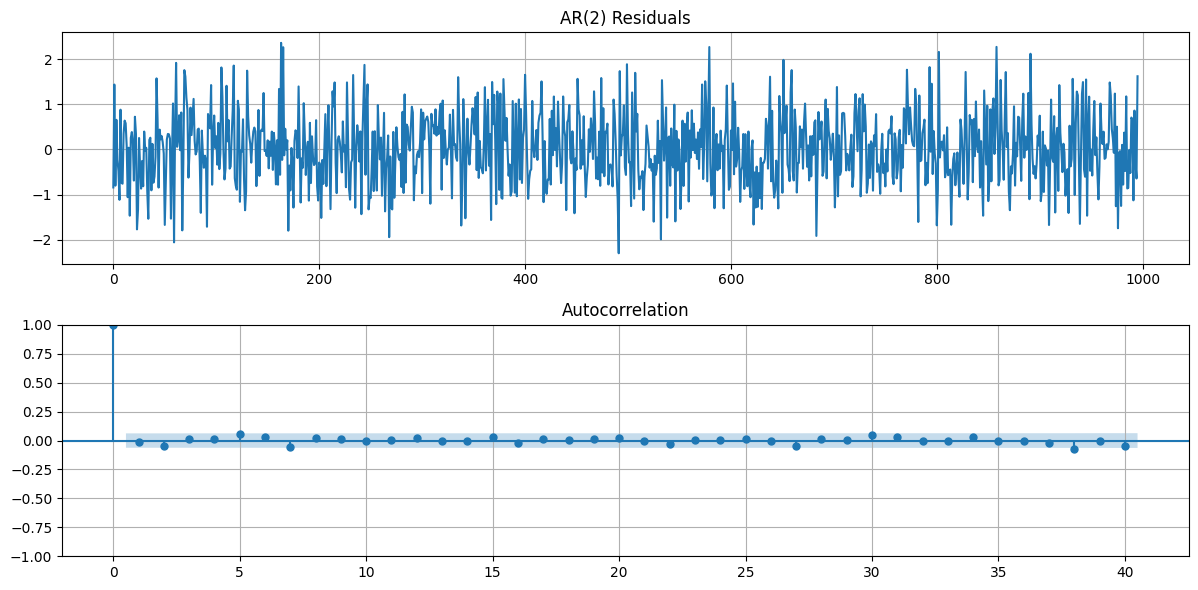

In [ ]:
# plot the residuals

fig, ax = plt.subplots(2,1,figsize=(12, 6))
ax[0].plot(e2)
ax[0].set_title('AR(2) Residuals')
ax[0].grid(True)

plot_acf(e2, lags=40, ax=ax[1])
ax[1].grid(True)

fig.tight_layout()


sigma_e2 = np.std(e2)
var_phi2 = sigma_e2**2 * np.linalg.inv(X2.T @ X2)
sigma_phi2 = np.sqrt(np.diag(var_phi2))

# print the AR(2) coefficients with confidence intervals
print('AR(2) Coefficients:')
print('Phi_1 = ', phi_ar2[0], '+/-', 1.96 * sigma_phi2[0])
print('Phi_2 = ', phi_ar2[1], '+/-', 1.96 * sigma_phi2[1])

